<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu_M_Assignment_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#a)In the state column, replace the -1 with the mode of state column.
# Calculate the mode of the 'state' column (most frequent value)

import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = "/content/Indian_food.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()

mode_state = df['state'].mode()[0]

# Replace '-1' values with the mode
df['state'] = df['state'].replace('-1', mode_state)

# Verify if the replacement was successful
df['state'].value_counts()


,count
state,
Gujarat,57
Punjab,32
Maharashtra,30
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9
Kerala,8


In [3]:
#b)Whatever the state you got in previous question, fill the corresponding region in the region column.
# Find the corresponding region for Gujarat
region_for_gujarat = df[df['state'] == 'Gujarat']['region'].mode()[0]

# Replace '-1' values in the 'region' column with the region of Gujarat
df['region'] = df['region'].replace('-1', region_for_gujarat)

# Verify if the replacement was successful
df['region'].value_counts()


,count
region,
West,96
North,49
South,49
East,31
North East,25
Central,3


In [4]:
#c)Replace the -1 with mean for cook time variable.
# Convert cook_time to numeric (in case it's stored as a string)
df['cook_time'] = pd.to_numeric(df['cook_time'], errors='coerce')

# Calculate the mean of 'cook_time', excluding -1 values
mean_cook_time = df[df['cook_time'] != -1]['cook_time'].mean()

# Replace -1 values with the calculated mean
df['cook_time'] = df['cook_time'].replace(-1, mean_cook_time)

# Verify if the replacement was successful
df['cook_time'].describe()


,cook_time
count,253.000000
mean,39.028689
std,46.931426
min,2.000000
25%,25.000000
50%,30.000000
75%,45.000000
max,720.000000


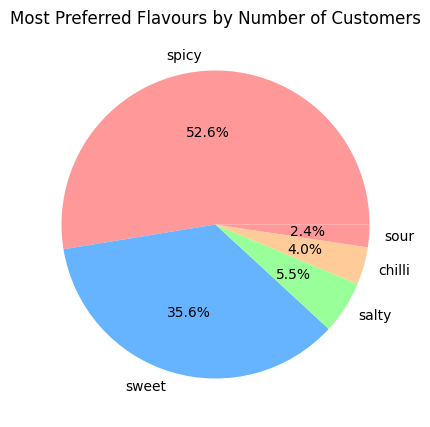

In [6]:
#d)Most preferred flavours by number of customers using pie chart.
import matplotlib.pyplot as plt

# Count the occurrences of each flavor profile
flavor_counts = df['flavor_profile'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Most Preferred Flavours by Number of Customers")
plt.show()


<ipython-input-8-6d24a136fdc4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis', order=course_counts.index)


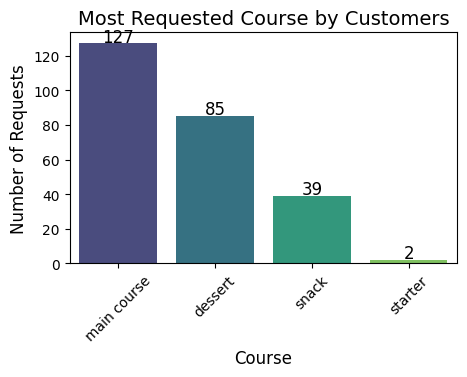

In [8]:
#e)Most requested course by customers using Bar chart. Print the labels also on the top of each bar. Then sort the bar chart in descending order.
import seaborn as sns

# Count the occurrences of each course
course_counts = df['course'].value_counts()

# Plot the bar chart
plt.figure(figsize=(5, 3))
ax = sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis', order=course_counts.index)

# Add labels on top of each bar
for i, value in enumerate(course_counts.values):
    ax.text(i, value + 1, str(value), ha='center', fontsize=12)

# Set titles and labels
plt.title("Most Requested Course by Customers", fontsize=14)
plt.xlabel("Course", fontsize=12)
plt.ylabel("Number of Requests", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

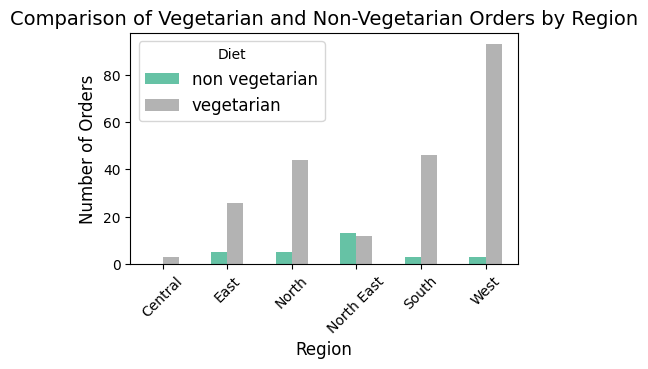

In [9]:
#f)Comparison between Vegetarians and Non-Veg orders in each region. Hint: You can use stacked/grouped bar chart for comparison.
# Count the number of vegetarian and non-vegetarian dishes in each region
veg_nonveg_counts = df.groupby(['region', 'Diet']).size().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
veg_nonveg_counts.plot(kind='bar', stacked=False, figsize=(5, 3), colormap='Set2')

# Set titles and labels
plt.title("Comparison of Vegetarian and Non-Vegetarian Orders by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Diet", fontsize=12)

# Show the plot
plt.show()


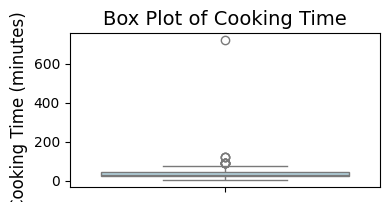

In [10]:
#g)Create the box plot for Order cooking time to see the distribution. Also check if there are any outliers in this column.
# Create a box plot for cook_time to check distribution and outliers
plt.figure(figsize=(4, 2))
sns.boxplot(y=df['cook_time'], color='lightblue')

# Set title and labels
plt.title("Box Plot of Cooking Time", fontsize=14)
plt.ylabel("Cooking Time (minutes)", fontsize=12)

# Show the plot
plt.show()
